In [35]:
import pandas as pd
import seaborn as sns
from typing import Tuple
import matplotlib.pyplot as plt

In [2]:
# import datasets
X_raw = pd.read_csv("dataset_normalised.csv")
y_raw = pd.read_csv("labnf.csv")

# numberical column that are needed for training
numeric_columns=['Shares (Basic)',
       'Shares (Diluted)', 'Cash, Cash Equivalents & Short Term Investments',
       'Accounts & Notes Receivable', 'Inventories', 'Total Current Assets',
       'Property, Plant & Equipment, Net',
       'Long Term Investments & Receivables', 'Other Long Term Assets',
       'Total Noncurrent Assets', 'Total Assets', 'Payables & Accruals',
       'Short Term Debt', 'Total Current Liabilities', 'Long Term Debt',
       'Total Noncurrent Liabilities', 'Total Liabilities',
       'Share Capital & Additional Paid-In Capital', 'Treasury Stock',
       'Retained Earnings', 'Total Equity', 'Total Liabilities & Equity',
       'Price_Present']
df = X_raw[numeric_columns]
df["target"] = y_raw["Label"].values
df.head()

<ipython-input-2-287bccefb633>:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["target"] = y_raw["Label"].values


,Shares (Basic),Shares (Diluted),"Cash, Cash Equivalents & Short Term Investments",Accounts & Notes Receivable,Inventories,Total Current Assets,"Property, Plant & Equipment, Net",Long Term Investments & Receivables,Other Long Term Assets,Total Noncurrent Assets,...,Long Term Debt,Total Noncurrent Liabilities,Total Liabilities,Share Capital & Additional Paid-In Capital,Treasury Stock,Retained Earnings,Total Equity,Total Liabilities & Equity,Price_Present,target
0,0.013189,0.013262,0.016228,0.002050,0.009389,0.011391,0.018365,0.000530,0.006310,0.012129,...,0.006773,0.015508,0.012695,0.055579,0.965186,0.190487,0.066599,0.011541,3.266000e-07,0
1,0.013075,0.013413,0.018553,0.002255,0.009771,0.012253,0.018454,0.000553,0.006675,0.012404,...,0.006809,0.015518,0.012950,0.055888,0.964960,0.191052,0.067596,0.012297,4.062000e-07,0
2,0.013189,0.013376,0.018476,0.002216,0.010876,0.009133,0.018462,0.000522,0.006469,0.012266,...,0.006664,0.015309,0.010308,0.056873,0.963789,0.191426,0.067837,0.010202,4.604000e-07,0
3,0.013189,0.013376,0.020836,0.002382,0.011640,0.010122,0.018547,0.000479,0.006733,0.012448,...,0.006681,0.014763,0.010283,0.057378,0.963789,0.191812,0.069293,0.010969,4.769000e-07,1
4,0.013227,0.013451,0.021719,0.002380,0.012241,0.010374,0.018531,0.000475,0.006684,0.012409,...,0.006748,0.014634,0.010079,0.058060,0.962956,0.192451,0.069853,0.011101,3.568000e-07,2


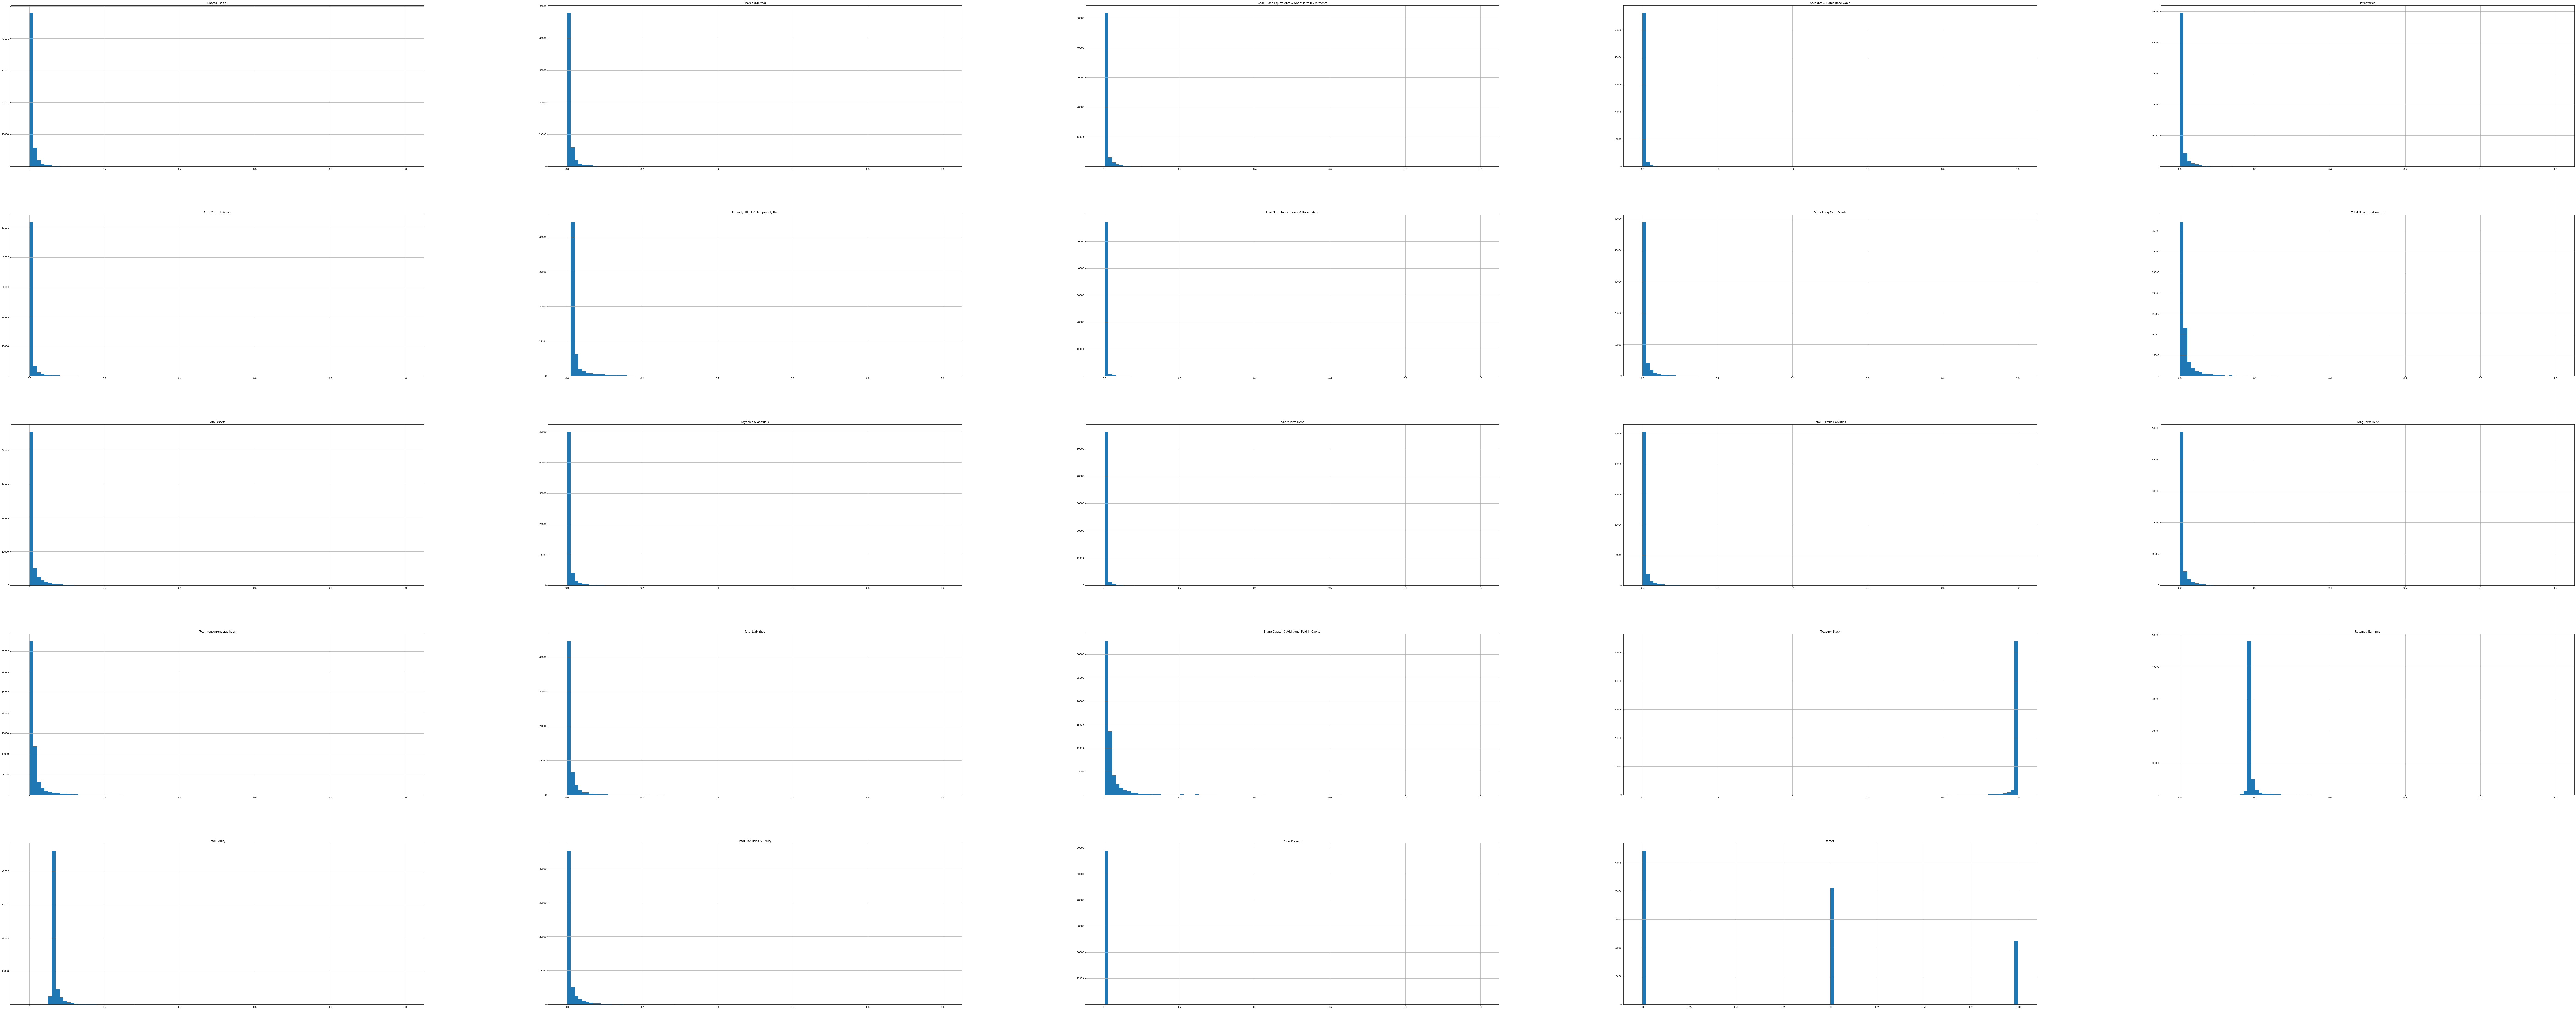

In [37]:
df.hist(bins=100,figsize=(200,80))
plt.savefig("./hist.png")

array([[<AxesSubplot:title={'center':'Shares (Basic)'}>,
        <AxesSubplot:title={'center':'Shares (Diluted)'}>,
        <AxesSubplot:title={'center':'Cash, Cash Equivalents & Short Term Investments'}>,
        <AxesSubplot:title={'center':'Accounts & Notes Receivable'}>,
        <AxesSubplot:title={'center':'Inventories'}>],
       [<AxesSubplot:title={'center':'Total Current Assets'}>,
        <AxesSubplot:title={'center':'Property, Plant & Equipment, Net'}>,
        <AxesSubplot:title={'center':'Long Term Investments & Receivables'}>,
        <AxesSubplot:title={'center':'Other Long Term Assets'}>,
        <AxesSubplot:title={'center':'Total Noncurrent Assets'}>],
       [<AxesSubplot:title={'center':'Total Assets'}>,
        <AxesSubplot:title={'center':'Payables & Accruals'}>,
        <AxesSubplot:title={'center':'Short Term Debt'}>,
        <AxesSubplot:title={'center':'Total Current Liabilities'}>,
        <AxesSubplot:title={'center':'Long Term Debt'}>],
       [<AxesSubplot

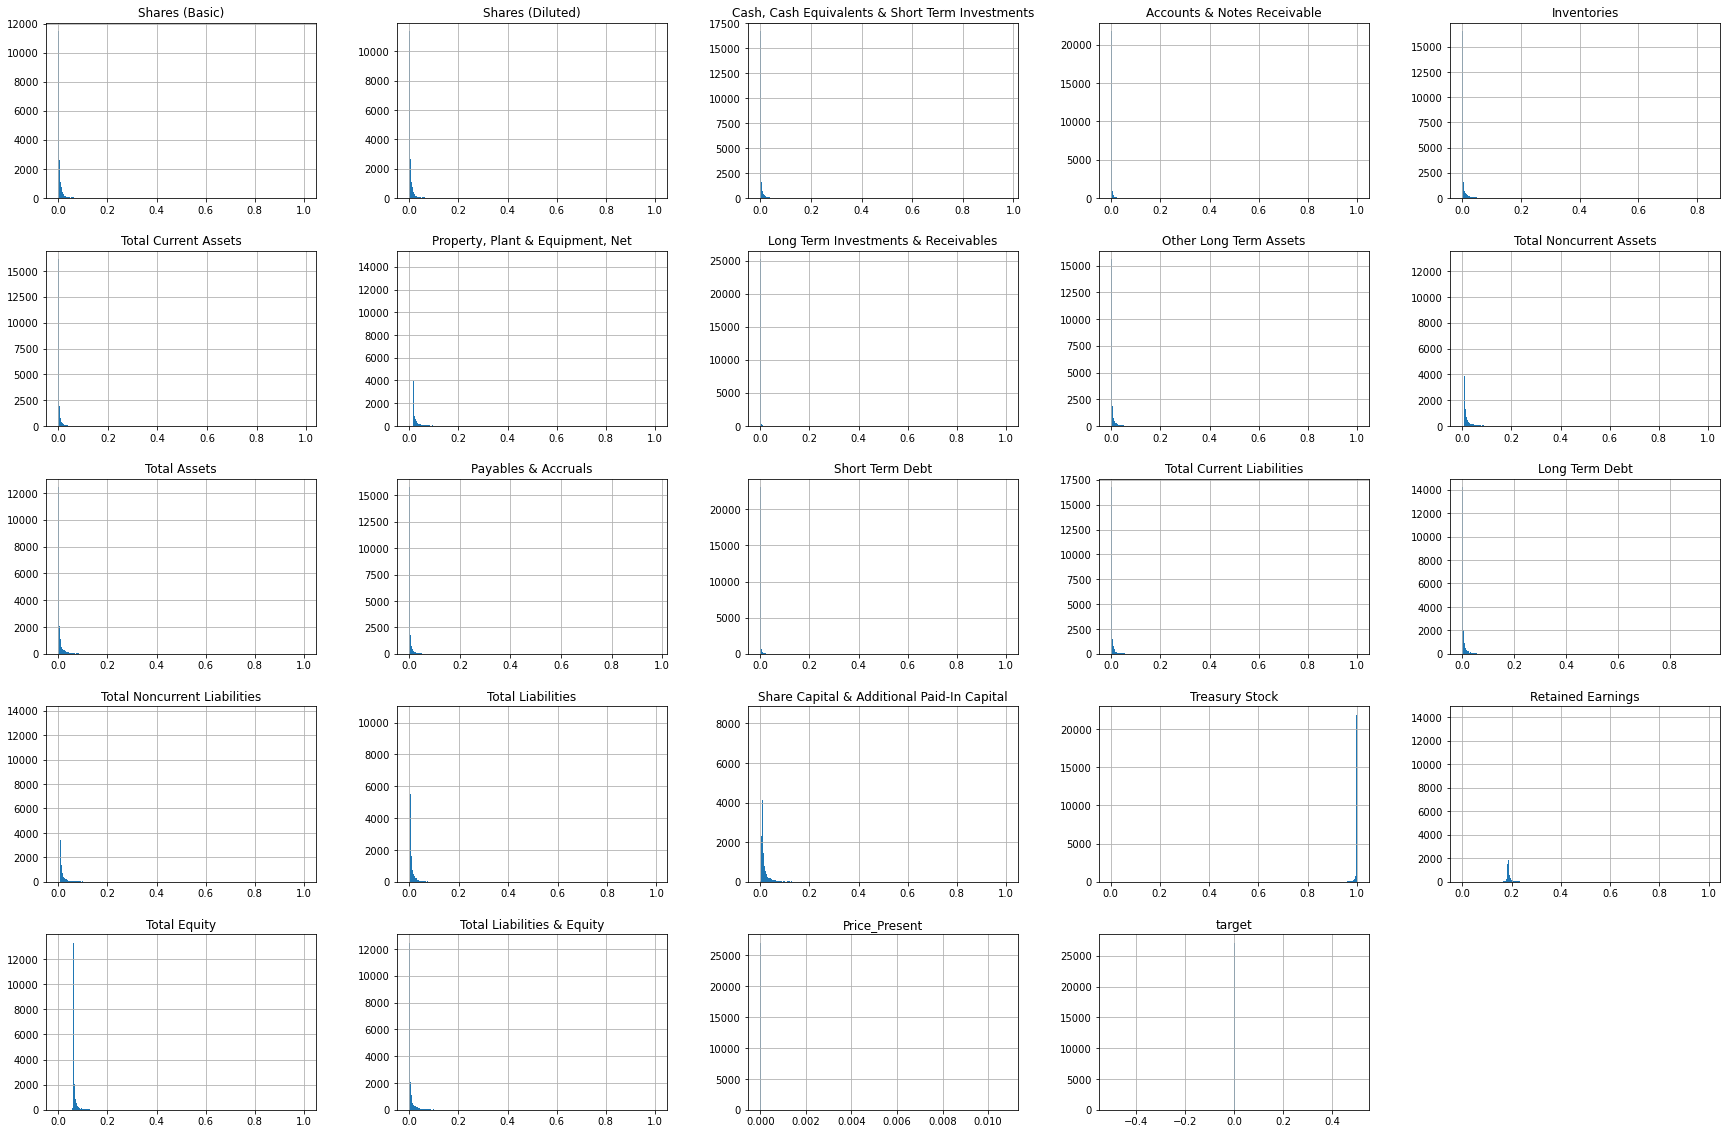

In [23]:
df_class_0 = df[df["target"] == 0 ]
df_class_1 = df[df["target"] == 1 ]
df_class_2 = df[df["target"] == 2 ]
    
    
df_class_0.hist(bins=500,figsize=(30,20))

_

## Resampling and Test Train Split

array([[<AxesSubplot:title={'center':'Shares (Basic)'}>,
        <AxesSubplot:title={'center':'Shares (Diluted)'}>,
        <AxesSubplot:title={'center':'Cash, Cash Equivalents & Short Term Investments'}>,
        <AxesSubplot:title={'center':'Accounts & Notes Receivable'}>,
        <AxesSubplot:title={'center':'Inventories'}>],
       [<AxesSubplot:title={'center':'Total Current Assets'}>,
        <AxesSubplot:title={'center':'Property, Plant & Equipment, Net'}>,
        <AxesSubplot:title={'center':'Long Term Investments & Receivables'}>,
        <AxesSubplot:title={'center':'Other Long Term Assets'}>,
        <AxesSubplot:title={'center':'Total Noncurrent Assets'}>],
       [<AxesSubplot:title={'center':'Total Assets'}>,
        <AxesSubplot:title={'center':'Payables & Accruals'}>,
        <AxesSubplot:title={'center':'Short Term Debt'}>,
        <AxesSubplot:title={'center':'Total Current Liabilities'}>,
        <AxesSubplot:title={'center':'Long Term Debt'}>],
       [<AxesSubplot

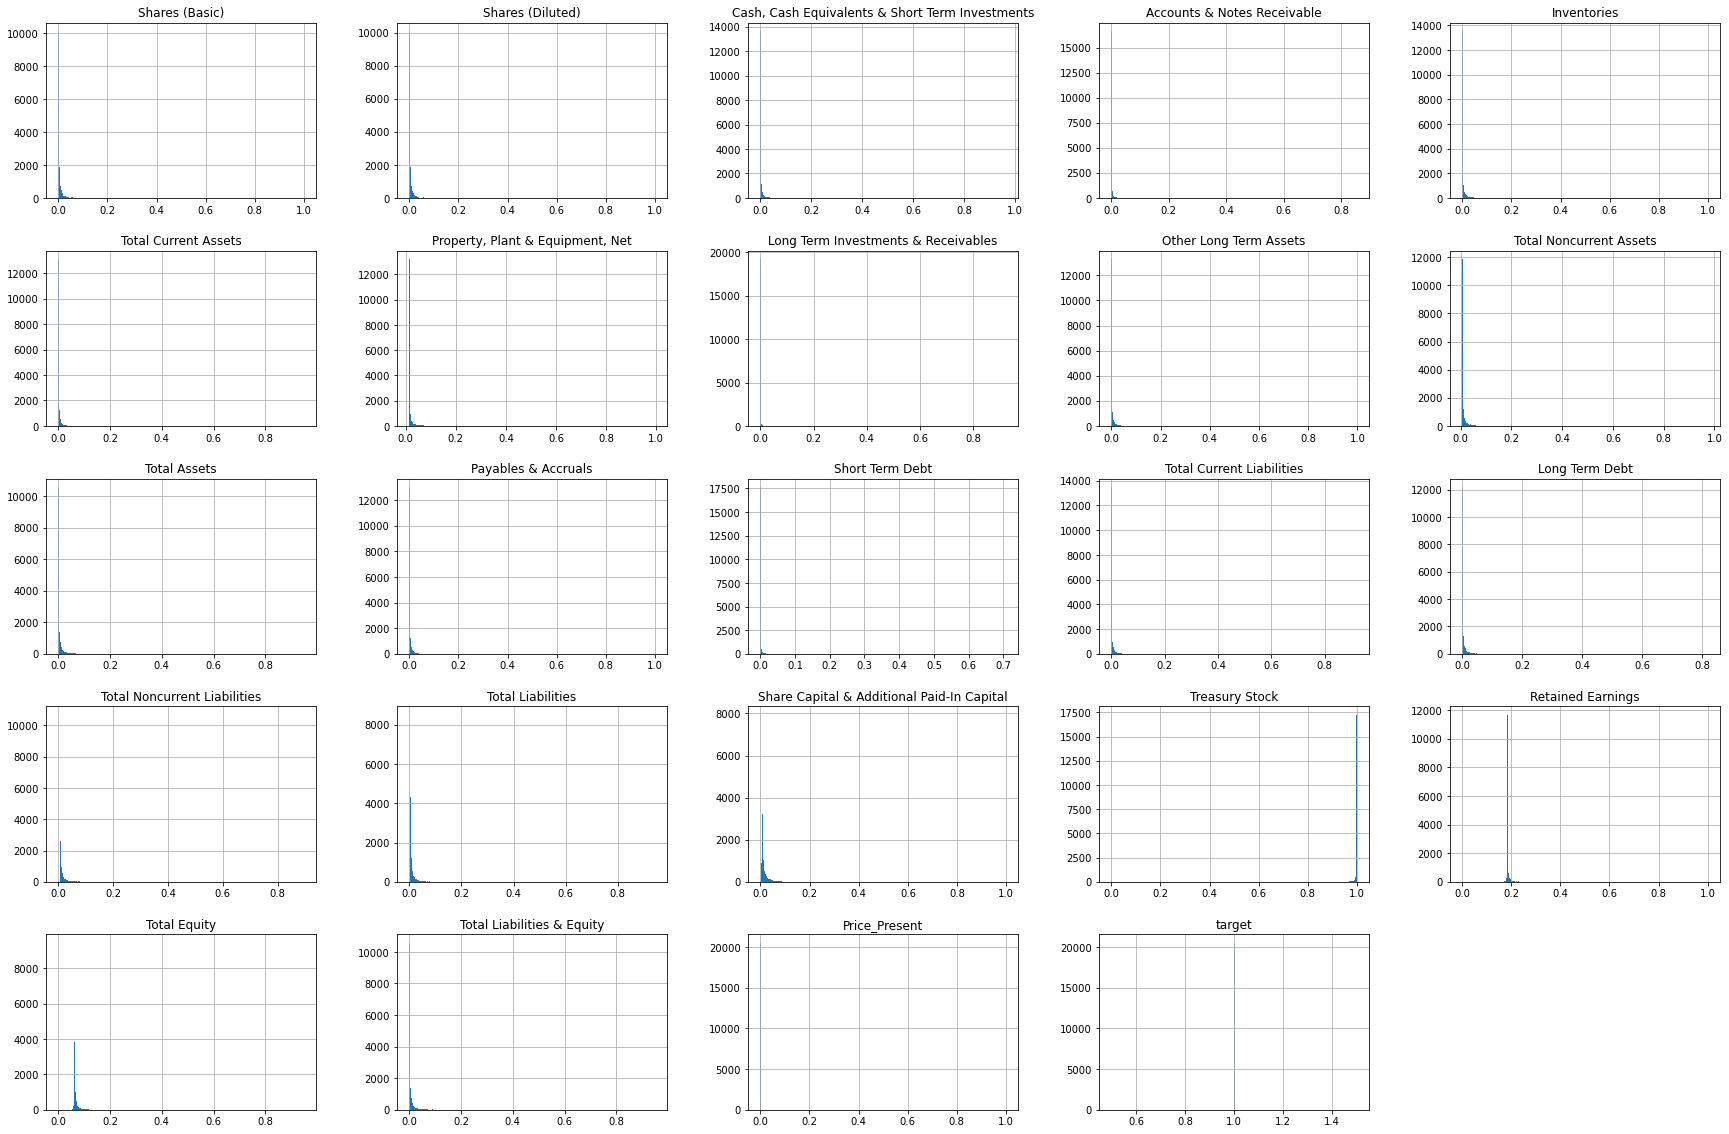

In [24]:
df_class_1.hist(bins=500,figsize=(30,20))


array([[<AxesSubplot:title={'center':'Shares (Basic)'}>,
        <AxesSubplot:title={'center':'Shares (Diluted)'}>,
        <AxesSubplot:title={'center':'Cash, Cash Equivalents & Short Term Investments'}>,
        <AxesSubplot:title={'center':'Accounts & Notes Receivable'}>,
        <AxesSubplot:title={'center':'Inventories'}>],
       [<AxesSubplot:title={'center':'Total Current Assets'}>,
        <AxesSubplot:title={'center':'Property, Plant & Equipment, Net'}>,
        <AxesSubplot:title={'center':'Long Term Investments & Receivables'}>,
        <AxesSubplot:title={'center':'Other Long Term Assets'}>,
        <AxesSubplot:title={'center':'Total Noncurrent Assets'}>],
       [<AxesSubplot:title={'center':'Total Assets'}>,
        <AxesSubplot:title={'center':'Payables & Accruals'}>,
        <AxesSubplot:title={'center':'Short Term Debt'}>,
        <AxesSubplot:title={'center':'Total Current Liabilities'}>,
        <AxesSubplot:title={'center':'Long Term Debt'}>],
       [<AxesSubplot

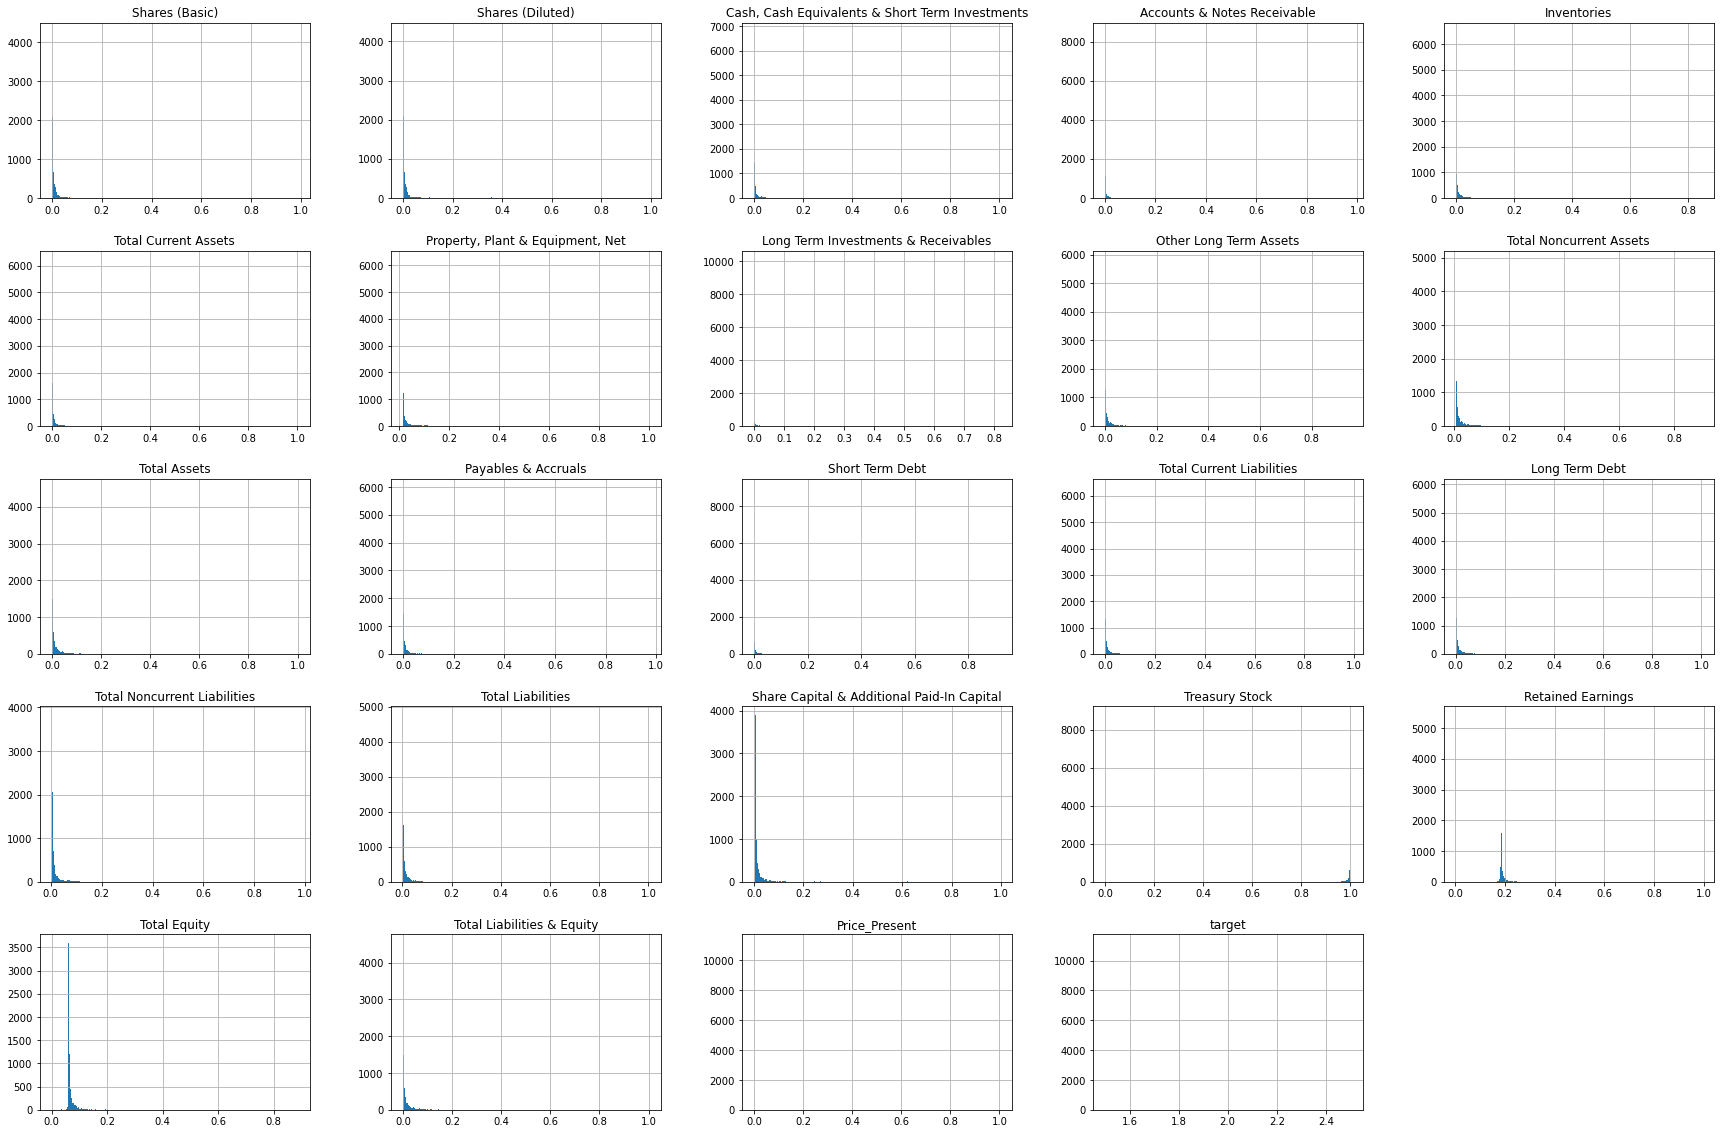

In [25]:
df_class_2.hist(bins=500,figsize=(30,20))


In [51]:
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler

In [46]:
# split 75:25
def split(df:pd.DataFrame,ratio=0.75)-> Tuple[pd.DataFrame]:
    """Split df into given ratio
    """
    
    n_train = int(df.shape[0]*0.75)
    return df[:n_train],df[n_train:]

def get_XY(df:pd.DataFrame)-> Tuple[pd.DataFrame]:
    """get X and Y from dataframe"""
    
    return df.drop(columns=["target"]),df["target"]

In [47]:
def plot_target_count(df:pd.DataFrame)->None:
    if "target" in df.keys():
        print(df["target"].value_counts())
        df["target"].value_counts().plot(kind="bar")
    else:
        print(df.value_counts())
        df.value_counts().plot(kind="bar")
        print(count_0,count_1,count_2)

2    2
1    2
dtype: int64

## Undersampling 

In [89]:
# undersample class 0 to size of class 1
def under_sample(n0:int,n1:int,n2:int,df:pd.DataFrame) -> pd.DataFrame:
    df_class_0 = df[df["target"] == 0 ]
    df_class_1 = df[df["target"] == 1 ]
    df_class_2 = df[df["target"] == 2 ]

    df_under_0 = df_class_0.sample(n0)
    df_under_1 = df_class_1.sample(n1)
    df_under_2 = df_class_2.sample(n2)

    return pd.concat([df_under_0,df_under_1,df_under_2],axis=0)

In [52]:
# under sample for train
#y_train_under = df_train_1["target"]
#X_train_under = df_train_1.drop(columns=["target"])

# normal train sets
#y_train = df_train["target"]
#X_train = df_train.drop(columns=["target"])

# test set remains the same
#y_test = df_test["target"]
#X_test = df_test.drop(columns=["target"])

## Over Sampling 

<AxesSubplot:>

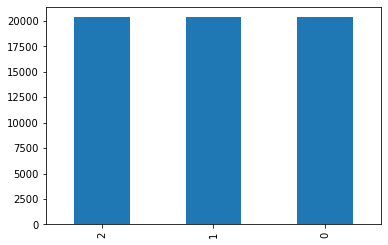

In [54]:
df_train,df_test = split(df)
X_train,y_train = get_XY(df_train)
X_test,y_test = get_XY(df_test)


ros = RandomOverSampler(random_state=0)
ros.fit(X_train,y_train)
X_train_over,y_train_over = ros.fit_resample(X_train,y_train)
y_train_over.value_counts().plot(kind="bar")

## Model

In [55]:
import sklearn
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier

In [56]:
clf  = RandomForestClassifier( max_depth=18,random_state=0)

In [65]:
#y_train = df_train_1["target"]
#y_test = df_test["target"]

#X_train = df_train_1.drop(columns=["target"])
#X_test = df_test.drop(columns=["target"])


def train_eval(clf,X_train,X_test,y_train,y_test,title=""):
    print(title)
    clf.fit(X_train,y_train)
    clf.score(X_train,y_train)
    clf.score(X_test,y_test)
    
    y_pred = clf.predict(X_test)

    print(sklearn.metrics.classification_report(y_test, y_pred,zero_division=False))
    sns.heatmap(sklearn.metrics.confusion_matrix(y_test,y_pred),annot=True,cmap="Blues")
    plt.show(sns)
    

Normal Sampling
              precision    recall  f1-score   support

           0       0.47      0.82      0.60      6752
           1       0.43      0.22      0.29      5259
           2       0.35      0.04      0.07      2696

    accuracy                           0.46     14707
   macro avg       0.42      0.36      0.32     14707
weighted avg       0.43      0.46      0.39     14707



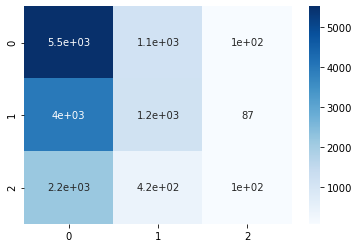

In [58]:
clf  = RandomForestClassifier( max_depth=18,random_state=0)

df_train,df_test = split(df)
X_train,y_train = get_XY(df_train)
X_test,y_test = get_XY(df_test)


train_eval(clf,X_train,X_test,y_train,y_test,title="Normal Sampling")

Normal Sampling
              precision    recall  f1-score   support

           0       0.00      0.00      0.00      6752
           1       0.36      1.00      0.53      5259
           2       0.00      0.00      0.00      2696

    accuracy                           0.36     14707
   macro avg       0.12      0.33      0.18     14707
weighted avg       0.13      0.36      0.19     14707



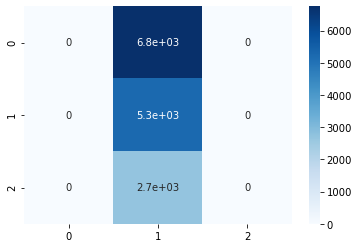

In [68]:
from sklearn import svm

clf1 = svm.SVC(C=2,gamma="auto",decision_function_shape="ovo", class_weight={1:1.1})

df_train,df_test = split(df)
X_train,y_train = get_XY(df_train)
X_test,y_test = get_XY(df_test)


train_eval(clf,X_train,X_test,y_train,y_test,title="Normal Sampling")




Over Sampling
              precision    recall  f1-score   support

           0       0.47      0.58      0.52      6752
           1       0.40      0.36      0.38      5259
           2       0.25      0.15      0.19      2696

    accuracy                           0.42     14707
   macro avg       0.37      0.36      0.36     14707
weighted avg       0.40      0.42      0.41     14707



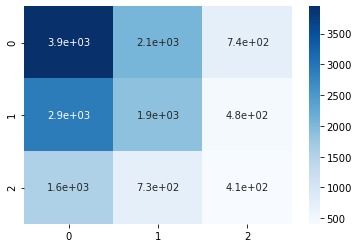

In [42]:
clf  = RandomForestClassifier( max_depth=18,random_state=0)
train_eval(clf,X_train_over,X_test,y_train_over,y_test,title="Over Sampling")

2    27096
1    27096
0    27096
Name: target, dtype: int64
20344 15282 8495


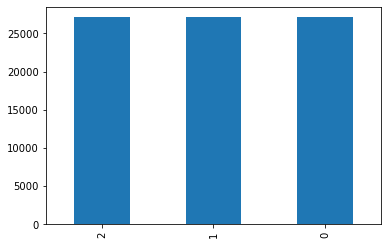

In [100]:
# over sample both test and train
ros = RandomOverSampler(random_state=0)
X,y = get_XY(df)
ros.fit(X,y)
X_over,y_over = ros.fit_resample(X,y)
df_over = X_over
df_over["target"]= y_over
plot_target_count(y_over)


# DF NEW


#df_new = under_sample(22000,20000,20000,df_over)
#plot_target_count(df_new)


Over Sampling All
              precision    recall  f1-score   support

           1       1.00      1.00      1.00      4417
           2       1.00      1.00      1.00     15905

    accuracy                           1.00     20322
   macro avg       1.00      1.00      1.00     20322
weighted avg       1.00      1.00      1.00     20322



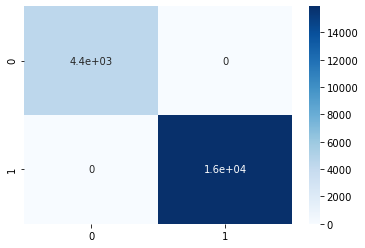

In [101]:
X_train_overall,X_test_overall = split(X_over)
y_train_overall,y_test_overall = split(y_over)

clf  = RandomForestClassifier( max_depth=18,random_state=0)
train_eval(clf,X_train_overall,X_test_overall,y_train_overall,y_test_overall,title="Over Sampling All")

New Sampling
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         0
           1       0.00      0.00      0.00         0
           2       1.00      0.16      0.28     15500

    accuracy                           0.16     15500
   macro avg       0.33      0.05      0.09     15500
weighted avg       1.00      0.16      0.28     15500



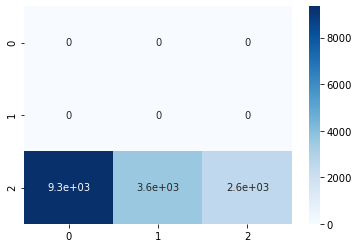

In [98]:
X_new,y_new = get_XY(df_new)

X_train_new,X_test_new = split(X_new)
y_train_new,y_test_new = split(y_new)

clf  = RandomForestClassifier( max_depth=18,random_state=0)
train_eval(clf,X_train_new,X_test_new,y_train_new,y_test_new,title="New Sampling")